<h1 style="text-align: center;">Regresi Linear</h1>
<table>
<tbody>
<tr>
<td style="text-align: left;">Penulis</td>
<td style="text-align: left;">:</td>
<td style="text-align: left;">Moch Rizky Wijaya</td>
</tr>
<tr>
<td style="text-align: left;">Fitur yang dibandingkan</td>
<td style="text-align: left;">:</td>
<td style="text-align: left;">ENGINESIZE dan FUELCONSUMPTION_COMB</td>
</tbody>
</table>
<p>&nbsp;</p>

In [0]:
#tulis library yang dibutuhkan
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [0]:
# Download data
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2019-08-07 09:21:24--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.02s   

2019-08-07 09:21:24 (2.78 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [0]:
#baca data dan deskripsikan data dengan .head()

df = pd.read_csv("FuelConsumption.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [0]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


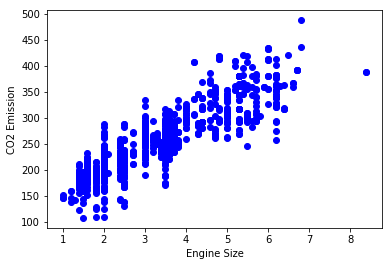

In [0]:
#lakukan ploting untuk fitur ENGINESIZE dan CO2EMISSIONS

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emission")
plt.show()

In [0]:
#bagi data set anda menjadi training dan testing

msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### ENGINE SIZE AND CO2 EMISSION

Coefficients:  [[39.25784583]]
Intercept:  [125.02964738]


Text(0, 0.5, 'CO2 Emission')

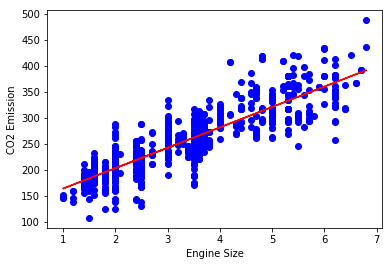

In [0]:
#lakukan training data untuk fitur ENGINESIZE dan CO2EMISSIONS dan tampilkan diagram sebarnya (scatter diagram)

from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emission")

Mean absolute error: 24.50
Residual sum of squares (MSE): 990.82
RMSE : 31.48
R2-score: 0.72


Text(0, 0.5, 'CO2 Emission')

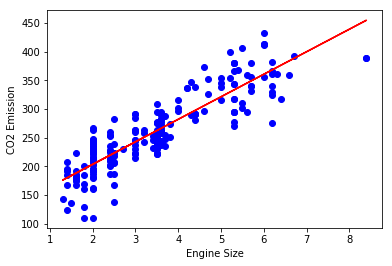

In [0]:
#lakukan testing data untuk fitur ENGINESIZE dan CO2EMISSIONS dan tampilkan diagram sebarnya (scatter diagram)

from sklearn.metrics import r2_score
import math

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("RMSE : %.2f" % math.sqrt(np.mean((test_y_ - test_y) ** 2)))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS,  color='blue')
plt.plot(test_x, regr.coef_[0][0]*test_x + regr.intercept_[0], '-r')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emission")

### FUEL CONSUMPTION COMBINATION AND CO2 EMISSION

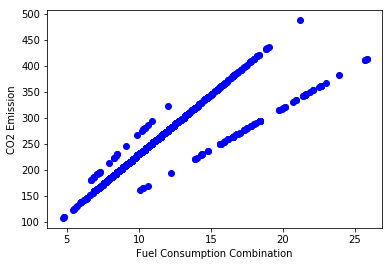

In [0]:
#lakukan ploting untuk fitur FUELCONSUMPTION_COMB dan CO2EMISSIONS

plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Fuel Consumption Combination")
plt.ylabel("CO2 Emission")
plt.show()

Coefficients:  [[16.11079605]]
Intercept:  [69.11766814]


Text(0, 0.5, 'CO2 Emission')

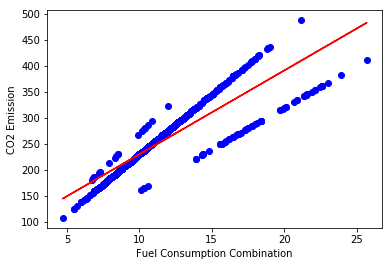

In [0]:
#lakukan training data untuk fitur FUELCONSUMPTION_COMB dan CO2EMISSIONS dan tampilkan diagram sebarnya (scatter diagram)

from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Fuel Consumption Combination")
plt.ylabel("CO2 Emission")

Mean absolute error: 20.52
Residual sum of squares (MSE): 803.65
RMSE : 28.35
R2-score: 0.76


Text(0, 0.5, 'CO2 Emission')

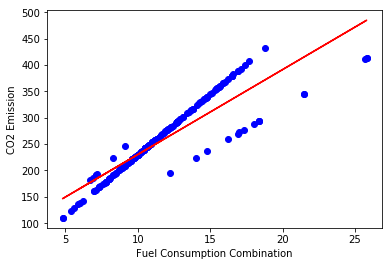

In [0]:
#lakukan testing data untuk fitur FUELCONSUMPTION_COMB dan CO2EMISSIONS dan tampilkan diagram sebarnya (scatter diagram)

from sklearn.metrics import r2_score
import math

test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("RMSE : %.2f" % math.sqrt(np.mean((test_y_ - test_y) ** 2)))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

plt.scatter(test.FUELCONSUMPTION_COMB, test.CO2EMISSIONS,  color='blue')
plt.plot(test_x, regr.coef_[0][0]*test_x + regr.intercept_[0], '-r')
plt.xlabel("Fuel Consumption Combination")
plt.ylabel("CO2 Emission")

**Analisa terkait hasil regresi dan testing untuk fitur yang berbeda**

Ada 2 fitur yang dilakukan perbandingan yaitu *Fuel Consumption Combination* dengan *Engine Size*. Kedua fitur tersebut dilakukan training dan kemudian divalidasi dengan testing. Training digunakan untuk mengetahui coefficients dan intercept. Testing digunakan mengetahui MAE (*Mean Absolute Error*) dan MSE (*Residual sum of Squares*). 

Data hasil training *Engine Size* dan *CO2 Emission* menghasilkan : 

Coefficients:  39.06\
Intercept :  125.44

Sementara hasil training *Fuel Consumption Combination* dan *CO2 Emission* menghasilkan : 

Coefficients:  16.25\
Intercept:  68.06

Berdasarkan hasil training fitur tersebut, fitur *Fuel Consumption Combination* dan *CO2 Emission* memiliki *coefficients* dan *intercept* yang lebih kecil dibandingkan fitur *Engine Size* dan *CO2 Emission*. Kedua fitur mempunyai data yang berbeda sehingga tidak dapat dibandingkan.

Data hasil testing *Engine Size* dan *CO2 Emission* menghasilkan :

Mean absolute error: 25.37\
Residual sum of squares (MSE): 1082.75\
RMSE : 32.91\
R2-score: 0.68

Sementara hasil testing *Fuel Consumption Combination* dan *CO2 Emission* menghasilkan : 

Mean absolute error: 21.52\
Residual sum of squares (MSE): 884.78\
RMSE : 29.75\
R2-score: 0.76

**Makna dari hasil plot testing dan error**

Berdasarkan hasil plot testing fitur *Engine Size* dan *CO2 Emission* dengan *Fuel Consumption Combination* dan *CO2 Emission*. Berdasarkan plot grafik regresi linier fitur *Fuel Consumption Combination* lebih berpengaruh terhadap *CO2 Emission* jika dibandingkan dengan *Fuel Consumption Combination* karena dapat dilihat dari persebaran data yang dimiliki *Fuel Consumption Combination* lebih berdekatan daripada Engine 



